In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools

import statsmodels.api as sm
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('office.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714
1,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.2,2.5164
2,7,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280,4,0.0,1.9656
3,9,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,0.2,5.7825
4,10,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.900,5,0.0,34.4700


In [5]:
office = df[['Order Date','Quantity']]

In [6]:
office.head()

,Order Date,Quantity
0,2016-06-12,2
1,2015-10-11,2
2,2014-06-09,4
3,2014-06-09,3
4,2014-06-09,5


In [7]:
office.dtypes
office['Order Date'] = pd.to_datetime(office['Order Date'], format='mixed')

In [8]:
office.sort_values("Order Date")
office.isnull().sum()

Order Date    0
Quantity      0
dtype: int64

In [9]:
office = office.groupby('Order Date')['Quantity'].sum().reset_index()

In [10]:
office = office.set_index('Order Date')
office.index

DatetimeIndex(['2014-01-03', '2014-01-04', '2014-01-05', '2014-01-06',
               '2014-01-07', '2014-01-09', '2014-01-10', '2014-01-13',
               '2014-01-16', '2014-01-18',
               ...
               '2017-12-21', '2017-12-22', '2017-12-23', '2017-12-24',
               '2017-12-25', '2017-12-26', '2017-12-27', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=1148, freq=None)

In [11]:
y = office['Quantity'].resample('MS').mean()

<Axes: xlabel='Order Date'>

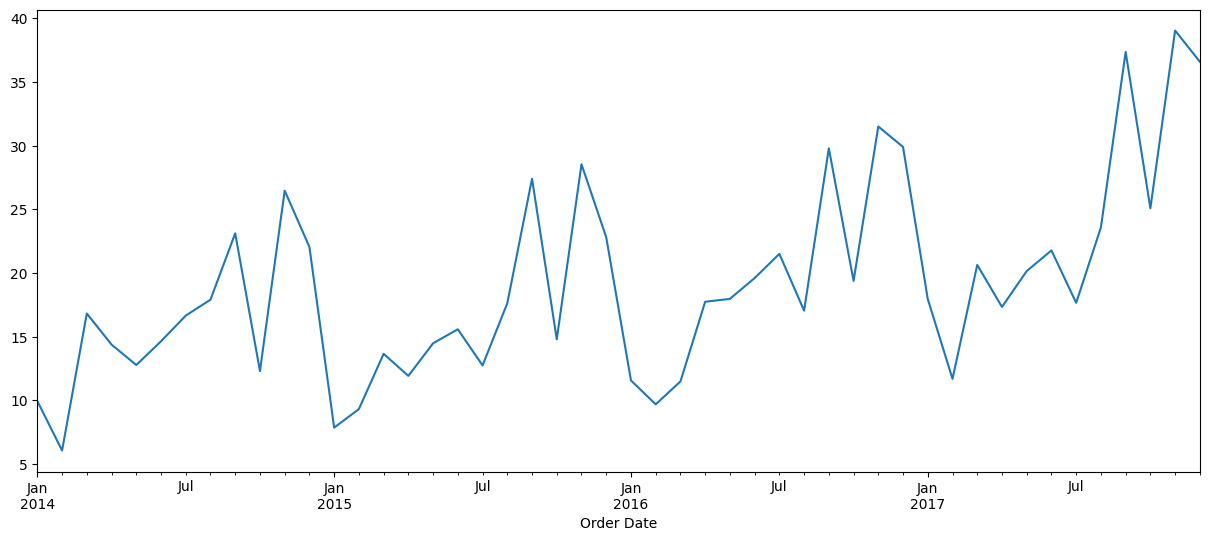

In [12]:
y.plot(figsize=(15,6))

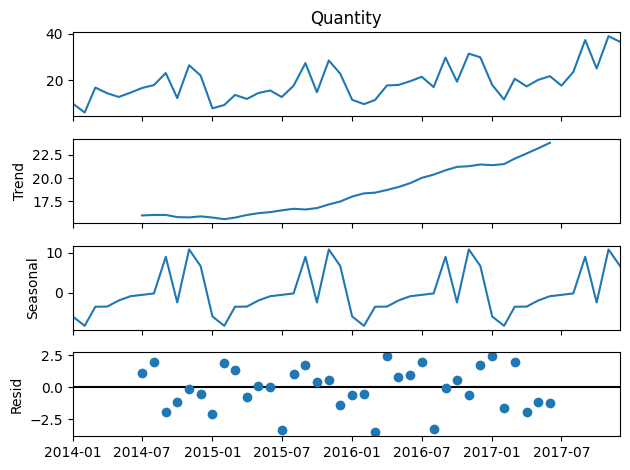

In [13]:
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
decomposition.plot()
plt.show()

In [14]:
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

print('Few parameter combinations are:')
print('{} x {} '.format(pdq[1], seasonal_pdq[1]))
print('{} x {} '.format(pdq[2], seasonal_pdq[2]))

Few parameter combinations are:
(0, 0, 1) x (0, 0, 1, 12) 
(0, 1, 0) x (0, 1, 0, 12) 


In [21]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(y, order=param, seasonal_order=param_seasonal, enforce_stationary=False, enforce_invertibility= False)
            results = model.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:427.4208513193722
ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:2104.2793793204155
ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:218.86628575257066
ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:220.80921140708344
ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:327.95839688208747
ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:1849.2560554670852
ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:220.7955251131754
ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:222.39084135533025
ARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:386.69773336607375
ARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:1988.5428053568103
ARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:220.51009447949568
ARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC:221.82926426043917
ARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:326.0382193340173
ARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:1938.0687785630976
ARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:221.46356091316304
ARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:222.62931005790858
ARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:295.7976281849085
ARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1261.8247181869983
ARIMA(0, 1, 0)x(0, 1, 0, 12) - A

In [15]:
train_data = y['2014-01-01':'2017-05-01']

In [16]:
model = sm.tsa.statespace.SARIMAX(train_data, order=(1,1,1),seasonal_order=(1,1,0,12), enforce_stationarity=False, enforce_invertibility=False)
results = model.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2277      0.458     -0.497      0.619      -1.126       0.670
ma.L1         -0.7276      0.310     -2.350      0.019      -1.334      -0.121
ar.S.L12      -0.4394      0.378     -1.162      0.245      -1.180       0.302
sigma2        10.6100      8.247      1.287      0.198      -5.553      26.773


In [17]:
predictions = results.predict()

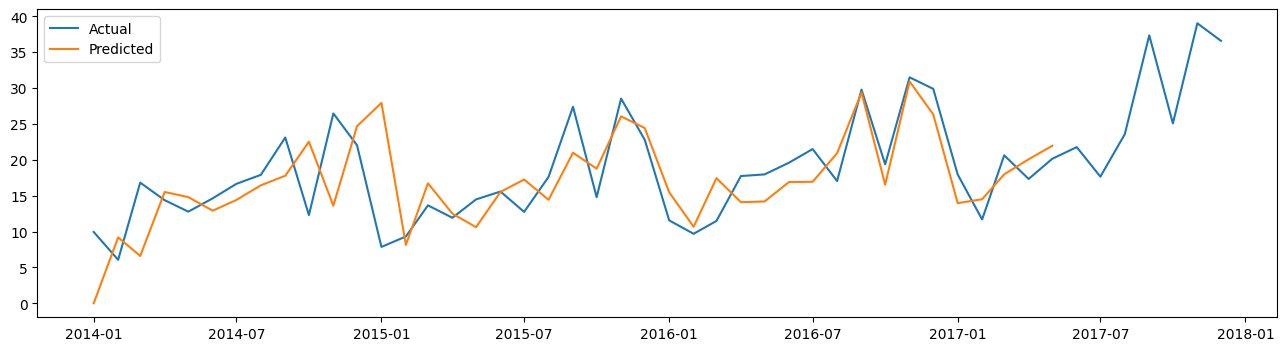

In [18]:
plt.figure(figsize=(16,4))
plt.plot(y, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()

In [19]:
next_5 = results.forecast(steps = 5)

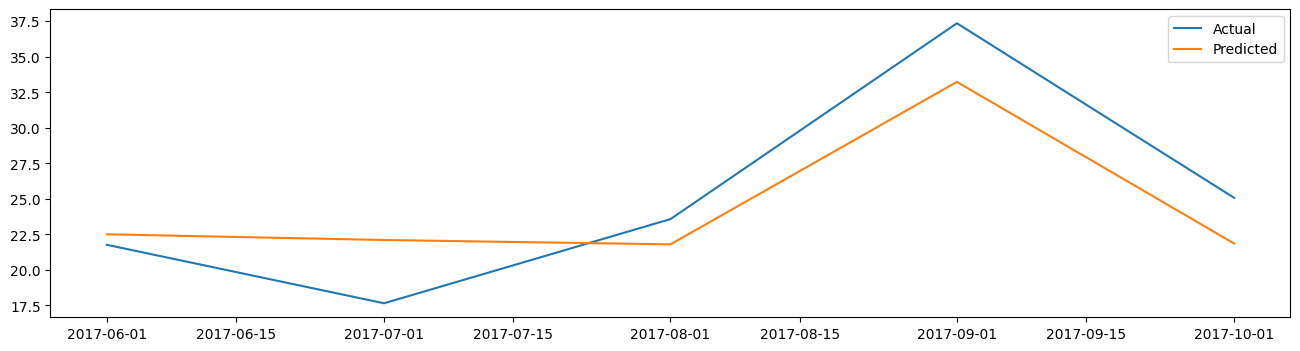

In [20]:
plt.figure(figsize=(16,4))
plt.plot(y['2017-06-01':'2017-10-01'],label='Actual')
plt.plot(next_5, label="Predicted")
plt.legend()

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [29]:
rmse = sqrt(mean_squared_error(train_data, predictions))
mae = mean_absolute_error(train_data, predictions)

In [30]:
rmse1 = sqrt(mean_squared_error(y['2017-06-01':'2017-10-01'], next_5))
mae1 = mean_absolute_error(y['2017-06-01':'2017-10-01'], next_5)

In [31]:
print('RMSE: ',rmse)
print('RMSE: ',rmse1)
print('MAE: ',mae)
print('MAR1: ',mae1)

RMSE:  5.510746701204793
RMSE:  3.1908706287095687
MAE:  4.019490792762699
MAR1:  2.862543404759321


In [25]:
next_5

2017-06-01    22.508034
2017-07-01    22.106621
2017-08-01    21.799527
2017-09-01    33.232046
2017-10-01    21.858278
Freq: MS, Name: predicted_mean, dtype: float64

In [27]:
y['2017-06-01':'2017-10-01']

Order Date
2017-06-01    21.769231
2017-07-01    17.653846
2017-08-01    23.576923
2017-09-01    37.357143
2017-10-01    25.076923
Freq: MS, Name: Quantity, dtype: float64

In [32]:
import pickle

In [33]:
filename = 'demand_office.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model, file)

print("Model saved successfully as", filename)

Model saved successfully as demand_office.pkl
